In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import sklearn
import sys
import tensorflow as tf
import time
import random
import pathlib

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


training_path = pathlib.Path('./champ_faces/training')
validation_path = pathlib.Path('./champ_faces/valid')
test_path = pathlib.Path('./champ_faces/test')

train_image_paths = list(training_path.glob('*/*'))  
valid_image_paths = list(validation_path.glob('*/*'))  
test_image_paths = list(test_path.glob('*/'))  

train_image_paths = [str(path) for path in train_image_paths]
valid_image_paths = [str(path) for path in valid_image_paths]
test_image_paths = [str(path) for path in test_image_paths]

random.shuffle(train_image_paths)
random.shuffle(valid_image_paths)
random.shuffle(test_image_paths)

train_image_count = len(train_image_paths)
valid_image_count = len(valid_image_paths)
test_image_count = len(test_image_paths)

print("Training Images -> ", train_image_count)
print("Validation Images -> ", valid_image_count)
print("Test Images -> ", test_image_count)

2.0.0
sys.version_info(major=3, minor=7, micro=5, releaselevel='final', serial=0)
numpy 1.16.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf
Training Images ->  104908
Validation Images ->  27800
Test Images ->  151


In [2]:
train_image_paths[:5]

['champ_faces\\training\\Bard\\662.jpg',
 'champ_faces\\training\\Trundle\\50.jpg',
 'champ_faces\\training\\Gragas\\492.jpg',
 'champ_faces\\training\\Jax\\439.jpg',
 "champ_faces\\training\\Kha'Zix\\510.jpg"]

In [3]:
valid_image_paths[:5]

['champ_faces\\valid\\Nami\\84.jpg',
 'champ_faces\\valid\\Galio\\169.jpg',
 'champ_faces\\valid\\Rengar\\157.jpg',
 'champ_faces\\valid\\Nami\\15.jpg',
 'champ_faces\\valid\\Shen\\160.jpg']

In [4]:
test_image_paths[:5]

['champ_faces\\test\\Malphite.jpg',
 'champ_faces\\test\\Singed.jpg',
 'champ_faces\\test\\Lissandra.jpg',
 'champ_faces\\test\\Renekton.jpg',
 'champ_faces\\test\\Varus.jpg']

In [5]:
label_names = sorted(item.name for item in training_path.glob('*/') if item.is_dir())
label_names

['Aatrox',
 'Ahri',
 'Akali',
 'Alistar',
 'Amumu',
 'Anivia',
 'Annie',
 'Aphelios',
 'Ashe',
 'Aurelion Sol',
 'Azir',
 'Bard',
 'Blitzcrank',
 'Brand',
 'Braum',
 'Caitlyn',
 'Camille',
 'Cassiopeia',
 "Cho'Gath",
 'Corki',
 'Darius',
 'Diana',
 'Dr. Mundo',
 'Draven',
 'Ekko',
 'Elise',
 'Evelynn',
 'Ezreal',
 'Fiddlesticks',
 'Fiora',
 'Fizz',
 'Galio',
 'Gangplank',
 'Garen',
 'Gnar',
 'Gragas',
 'Graves',
 'Hecarim',
 'Heimerdinger',
 'Illaoi',
 'Irelia',
 'Ivern',
 'Janna',
 'Jarvan\xa0IV',
 'Jax',
 'Jayce',
 'Jhin',
 'Jinx',
 "Kai'Sa",
 'Kalista',
 'Karma',
 'Karthus',
 'Kassadin',
 'Katarina',
 'Kayle',
 'Kayn',
 'Kennen',
 "Kha'Zix",
 'Kindred',
 'Kled',
 "Kog'Maw",
 'LeBlanc',
 'Lee Sin',
 'Leona',
 'Lissandra',
 'Lucian',
 'Lulu',
 'Lux',
 'Malphite',
 'Malzahar',
 'Maokai',
 'Master Yi',
 'Miss Fortune',
 'Mordekaiser',
 'Morgana',
 'Nami',
 'Nasus',
 'Nautilus',
 'Neeko',
 'Nidalee',
 'Nocturne',
 'None',
 'None2',
 'Nothing',
 'Nunu\xa0&\xa0Willump',
 'Olaf',
 'Orianna'

In [6]:
training_image_labels = [pathlib.Path(path).parent.name for path in train_image_paths]
for image, label in zip(train_image_paths[:5], training_image_labels[:5]):
    print(image, ' --->  ', label)

champ_faces\training\Bard\662.jpg  --->   Bard
champ_faces\training\Trundle\50.jpg  --->   Trundle
champ_faces\training\Gragas\492.jpg  --->   Gragas
champ_faces\training\Jax\439.jpg  --->   Jax
champ_faces\training\Kha'Zix\510.jpg  --->   Kha'Zix


In [7]:
train_labels_info = []
for image_path, label in zip(train_image_paths, training_image_labels):
    train_labels_info.append((image_path, label))

In [8]:
import pprint
pprint.pprint(train_labels_info[:5])

[('champ_faces\\training\\Bard\\662.jpg', 'Bard'),
 ('champ_faces\\training\\Trundle\\50.jpg', 'Trundle'),
 ('champ_faces\\training\\Gragas\\492.jpg', 'Gragas'),
 ('champ_faces\\training\\Jax\\439.jpg', 'Jax'),
 ("champ_faces\\training\\Kha'Zix\\510.jpg", "Kha'Zix")]


In [9]:
valid_image_labels = [pathlib.Path(path).parent.name for path in valid_image_paths]
for image, label in zip(valid_image_paths[:5], valid_image_labels[:5]):
    print(image, ' --->  ', label)

champ_faces\valid\Nami\84.jpg  --->   Nami
champ_faces\valid\Galio\169.jpg  --->   Galio
champ_faces\valid\Rengar\157.jpg  --->   Rengar
champ_faces\valid\Nami\15.jpg  --->   Nami
champ_faces\valid\Shen\160.jpg  --->   Shen


In [10]:
valid_labels_info = []
for image_path, label in zip(valid_image_paths, valid_image_labels):
    valid_labels_info.append((image_path, label))

In [11]:
pprint.pprint(valid_labels_info[:5])

[('champ_faces\\valid\\Nami\\84.jpg', 'Nami'),
 ('champ_faces\\valid\\Galio\\169.jpg', 'Galio'),
 ('champ_faces\\valid\\Rengar\\157.jpg', 'Rengar'),
 ('champ_faces\\valid\\Nami\\15.jpg', 'Nami'),
 ('champ_faces\\valid\\Shen\\160.jpg', 'Shen')]


In [12]:
test_image_labels = [path.split('\\')[2].split('.')[0] for path in test_image_paths]
for image, label in zip(test_image_paths[:5], test_image_labels[:5]):
    print(image, ' --->  ', label)

champ_faces\test\Malphite.jpg  --->   Malphite
champ_faces\test\Singed.jpg  --->   Singed
champ_faces\test\Lissandra.jpg  --->   Lissandra
champ_faces\test\Renekton.jpg  --->   Renekton
champ_faces\test\Varus.jpg  --->   Varus


In [13]:
test_labels_info = []
for image_path, label in zip(test_image_paths, test_image_labels):
    test_labels_info.append((image_path, label))

In [14]:
train_df = pd.DataFrame(train_labels_info)
valid_df = pd.DataFrame(valid_labels_info)
test_df = pd.DataFrame(test_labels_info)

train_df.columns = valid_df.columns =test_df.columns = ['filepath', 'class']

print(train_df.head())
print(valid_df.head())
print(test_df.head())

                               filepath    class
0     champ_faces\training\Bard\662.jpg     Bard
1   champ_faces\training\Trundle\50.jpg  Trundle
2   champ_faces\training\Gragas\492.jpg   Gragas
3      champ_faces\training\Jax\439.jpg      Jax
4  champ_faces\training\Kha'Zix\510.jpg  Kha'Zix
                           filepath   class
0     champ_faces\valid\Nami\84.jpg    Nami
1   champ_faces\valid\Galio\169.jpg   Galio
2  champ_faces\valid\Rengar\157.jpg  Rengar
3     champ_faces\valid\Nami\15.jpg    Nami
4    champ_faces\valid\Shen\160.jpg    Shen
                         filepath      class
0   champ_faces\test\Malphite.jpg   Malphite
1     champ_faces\test\Singed.jpg     Singed
2  champ_faces\test\Lissandra.jpg  Lissandra
3   champ_faces\test\Renekton.jpg   Renekton
4      champ_faces\test\Varus.jpg      Varus


In [15]:
height = 32
width = 32
channels = 3
batch_size = 128
num_classes = 152

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    #像素值 都除以255
    rescale = 1./255,
    # 图片随机旋转 (5度以内)
    rotation_range = 20,
    # 图片左右位移  20%限度以内
    width_shift_range = 0.2,
    # 图片上下位移  20%限度以内
    height_shift_range = 0.2,
    # 图像剪切强度
    shear_range = 0.2,
    # 图像缩放强度
    zoom_range = 0.2,
    # 是否水平翻转
    horizontal_flip = False,
    # 放大缩小吼， 像素填充方式
    fill_mode = 'nearest',
)

train_generator = train_datagen.flow_from_dataframe(train_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 2333,
                                                    shuffle = True,
                                                    class_mode = "categorical")

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
)
valid_generator = valid_datagen.flow_from_dataframe(valid_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 666,
                                                    shuffle = True,
                                                    class_mode = "categorical")

test_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
)
test_generator = test_datagen.flow_from_dataframe(test_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 9727,
                                                    shuffle = True,
                                                    class_mode = "categorical")

Found 104908 validated image filenames belonging to 151 classes.
Found 27800 validated image filenames belonging to 151 classes.
Found 150 validated image filenames belonging to 151 classes.


In [16]:
train_num = train_generator.samples
valid_num = valid_generator.samples
test_num = test_generator.samples

print("Training Generator Sample -> ", train_num)
print("Validation Generator Sample -> ", valid_num)
print("Test Generator Sample -> ", test_num)

Training Generator Sample ->  104908
Validation Generator Sample ->  27800
Test Generator Sample ->  150


In [17]:
for i in range(2):
    x, y = train_generator.next()
    print(x.shape, y.shape)
    print(y)

(128, 32, 32, 3) (128, 151)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(128, 32, 32, 3) (128, 151)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
model = keras.models.Sequential([
    
    keras.layers.Conv2D(filters=16, kernel_size = 3, padding='same',
                       activation = 'selu', input_shape = [width, height, channels]),
    keras.layers.Conv2D(filters=16, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=32, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.Conv2D(filters=32, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=64, kernel_size = 3, padding='same',
                       activation = 'selu', input_shape = [width, height, channels]),
    keras.layers.Conv2D(filters=64, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'selu'),
    keras.layers.AlphaDropout(rate=0.5),
    
    keras.layers.Dense(num_classes, activation = 'softmax')
])

model.compile(loss="categorical_crossentropy",
             optimizer = "adam", metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          1

In [19]:
logdir = './face_recognition'
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir, "face_recognition_model.h5")

callbacks = [
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-4)
]

In [20]:
epochs = 50
#因为数据是generator 产生的 所以不能用fit函数
history = model.fit_generator(train_generator, steps_per_epoch=train_num // batch_size,
                             epochs=epochs, validation_data=valid_generator,
                             validation_steps=valid_num//batch_size)

Epoch 1/20
819/819 [==============================] - 121s 148ms/step - loss: 1.3902 - accuracy: 0.6494 - val_loss: 0.0817 - val_accuracy: 0.9799
Epoch 2/20
819/819 [==============================] - 126s 153ms/step - loss: 0.3007 - accuracy: 0.9103 - val_loss: 0.0609 - val_accuracy: 0.9849
Epoch 3/20
819/819 [==============================] - 119s 145ms/step - loss: 0.1839 - accuracy: 0.9437 - val_loss: 0.0351 - val_accuracy: 0.9915
Epoch 4/20
819/819 [==============================] - 121s 147ms/step - loss: 0.1523 - accuracy: 0.9534 - val_loss: 0.0520 - val_accuracy: 0.9889
Epoch 5/20
819/819 [==============================] - 118s 144ms/step - loss: 0.1320 - accuracy: 0.9603 - val_loss: 0.2218 - val_accuracy: 0.9698
Epoch 6/20
819/819 [==============================] - 122s 149ms/step - loss: 0.1190 - accuracy: 0.9647 - val_loss: 0.0123 - val_accuracy: 0.9969
Epoch 7/20
819/819 [==============================] - 118s 144ms/step - loss: 0.1070 - accuracy: 0.9683 - val_loss: 0.0318 -

In [21]:
def plot_learning_curves(history, label, epochs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_' + label]
    
    pd.DataFrame(data).plot(figsize = (8,5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()

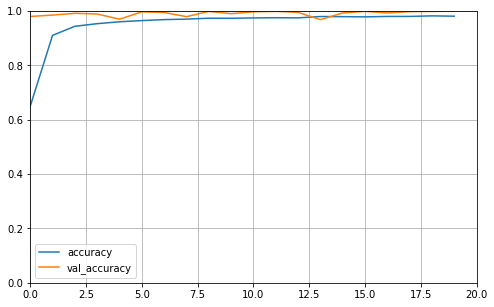

In [22]:
plot_learning_curves(history, 'accuracy', epochs, 0, 1)

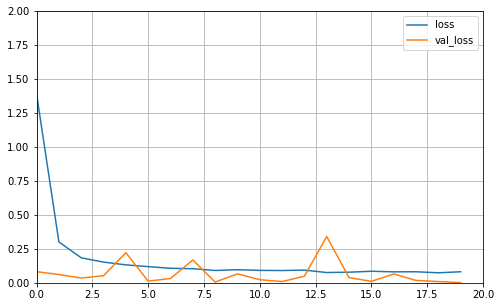

In [23]:
plot_learning_curves(history, 'loss', epochs, 0, 2)

In [24]:
def load_and_preprocess_single_img(path):
    # read the img through file path
    image = tf.io.read_file(path)  
    image = tf.image.decode_jpeg(image, channels=3)
    # 原始图片大小为(128, 128, 3)，重设为(32, 32)
    image = tf.image.resize(image, [32, 32])  
    image = tf.cast(image, tf.float32) / 255.0  # 归一化到[0,1]范围
    image = np.expand_dims(image, axis = 0) # since you have batch_size, so you need to expand your image
    return image

In [25]:
def evaluate_single_pic(path, show=False):
    
    if show:
        import matplotlib.image as mpimg
        plt.imshow(mpimg.imread(path))
    image = load_and_preprocess_single_img(path)
    predict_result = model.predict(image)
    print("This is", label_names[np.argmax(predict_result, axis=1)[0]])

In [26]:
# test_pic_path = "./lol_data_1/test_2/13.png"
# evaluate_single_pic(test_pic_path, True)

In [27]:
# test_pic_path2 = "./lol_data_1/test_2/2.png"
# evaluate_single_pic(test_pic_path2, True)

In [28]:
test_accuracy = model.evaluate(test_generator)
print(test_accuracy)

2/2 [==============================] - 0s 208ms/step - loss: 0.0000e+00 - accuracy: 1.0000
[0.0, 1.0]


In [29]:
model.save_weights('./checkpoints/my_checkpoint')

In [30]:
model.save('./face_recognition_model.h5')